In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("sales_data_with_issues.csv")
df.head(10)


,Date,Region,Category,Sales
0,2023-06-21,North,Furniture,575.07
1,2023-07-17,North,Furniture,1537.26
2,2023-07-28,East,Technology,1543.61
3,2023-10-04,South,Technology,1441.21
4,2023-06-07,East,Office Supplies,4923.52
5,2023-11-07,South,Technology,567.06
6,2023-09-27,West,Technology,NaN
7,2023-09-18,South,Furniture,3339.69
8,2023-09-30,North,Technology,1274.06
9,2023-05-04,West,Technology,3913.17


In [4]:
# Loading the data

salesData = pd.read_csv('sales_data_with_issues.csv')
salesData

,Date,Region,Category,Sales
0,2023-06-21,North,Furniture,575.07
1,2023-07-17,North,Furniture,1537.26
2,2023-07-28,East,Technology,1543.61
3,2023-10-04,South,Technology,1441.21
4,2023-06-07,East,Office Supplies,4923.52
...,...,...,...,...
200,2023-03-25,West,Office Supplies,1792.31
201,2023-07-14,East,Technology,4411.82
202,2023-04-02,South,Technology,635.79
203,2023-07-20,North,Furniture,673.73


In [5]:
#no.of rows n columns
df.shape

(205, 4)

In [6]:
#column names
df.columns

Index(['Date', 'Region', 'Category', 'Sales'], dtype='object')

In [7]:
#Data quality check
df.isnull().sum()

Date        0
Region      3
Category    0
Sales       5
dtype: int64

In [8]:
df.dtypes


Date         object
Region       object
Category     object
Sales       float64
dtype: object

In [9]:
df.nunique

<bound method DataFrame.nunique of            Date Region         Category    Sales
0    2023-06-21  North        Furniture   575.07
1    2023-07-17  North        Furniture  1537.26
2    2023-07-28   East       Technology  1543.61
3    2023-10-04  South       Technology  1441.21
4    2023-06-07   East  Office Supplies  4923.52
..          ...    ...              ...      ...
200  2023-03-25   West  Office Supplies  1792.31
201  2023-07-14   East       Technology  4411.82
202  2023-04-02  South       Technology   635.79
203  2023-07-20  North        Furniture   673.73
204  2023-07-19  South       Technology  1336.89

[205 rows x 4 columns]>

Missing values by column:
Date        0
Region      3
Category    0
Sales       5
dtype: int64

Average sales by category:
Category
Technology         2615.564925
Office Supplies    2601.263906
Furniture          2464.836377
Name: Sales, dtype: float64


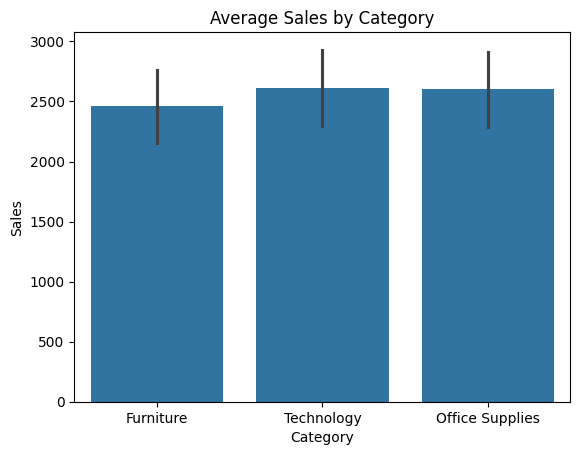


Total sales by region:
Region
East     133186.70
North    128554.09
West     121530.31
South    117033.54
Name: Sales, dtype: float64


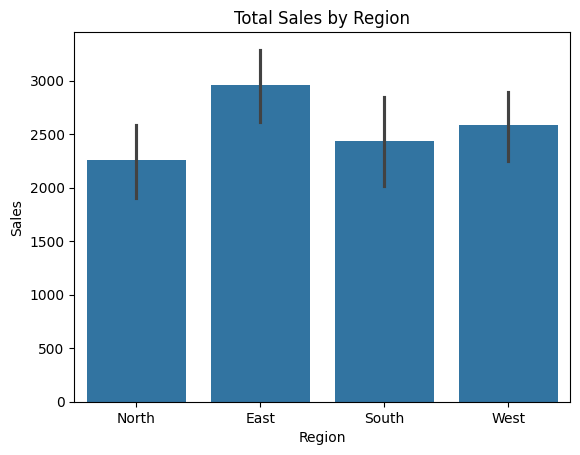


Monthly sales trend:
Date
2023-01    36266.07
2023-02    37527.90
2023-03    54646.70
2023-04    65641.71
2023-05    30821.87
2023-06    33070.25
2023-07    61041.08
2023-08    39837.48
2023-09    57629.26
2023-10    39576.65
2023-11    24268.67
2023-12    31469.81
Freq: M, Name: Sales, dtype: float64


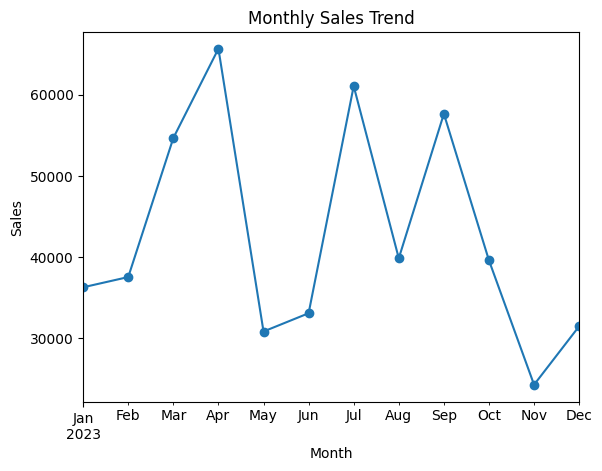


Number of sales outliers: 0
Empty DataFrame
Columns: [Date, Region, Category, Sales]
Index: []


In [10]:
# Data Insights and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
sales_df = pd.read_csv('sales_data_with_issues.csv')

# 1. Missing values summary
print('Missing values by column:')
print(sales_df.isnull().sum())

# 2. Top performing categories
print('\nAverage sales by category:')
print(sales_df.groupby('Category')['Sales'].mean().sort_values(ascending=False))
sns.barplot(x='Category', y='Sales', data=sales_df)
plt.title('Average Sales by Category')
plt.show()

# 3. Regional sales distribution
print('\nTotal sales by region:')
print(sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False))
sns.barplot(x='Region', y='Sales', data=sales_df)
plt.title('Total Sales by Region')
plt.show()

# 4. Sales trends over time
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
monthly_sales = sales_df.groupby(sales_df['Date'].dt.to_period('M'))['Sales'].sum()
print('\nMonthly sales trend:')
print(monthly_sales)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

# 5. Outlier detection (IQR method)
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = sales_df[(sales_df['Sales'] < Q1 - 1.5 * IQR) | (sales_df['Sales'] > Q3 + 1.5 * IQR)]
print(f'\nNumber of sales outliers: {len(outliers)}')
print(outliers[['Date','Region','Category','Sales']])

In [11]:
# Top Performing KPIs
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')

# Total Sales
total_sales = sales_df['Sales'].sum()
print(f'Total Sales: {total_sales:.2f}')

# Average Sales per Transaction
average_sales = sales_df['Sales'].mean()
print(f'Average Sales per Transaction: {average_sales:.2f}')

# Top Region by Total Sales
top_region = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False).index[0]
print(f'Top Region by Total Sales: {top_region}')

# Top Category by Total Sales
top_category = sales_df.groupby('Category')['Sales'].sum().sort_values(ascending=False).index[0]
print(f'Top Category by Total Sales: {top_category}')

# Sales Growth (First vs Last Month)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
monthly_sales = sales_df.groupby(sales_df['Date'].dt.to_period('M'))['Sales'].sum()
if len(monthly_sales) > 1:
    growth = ((monthly_sales.iloc[-1] - monthly_sales.iloc[0]) / monthly_sales.iloc[0]) * 100
    print(f'Sales Growth (First vs Last Month): {growth:.2f}%')
else:
    print('Not enough data for sales growth calculation.')

Total Sales: 511797.45
Average Sales per Transaction: 2558.99
Top Region by Total Sales: East
Top Category by Total Sales: Technology
Sales Growth (First vs Last Month): -13.23%


Average Sales per Region per Month:
Region          East        North        South         West
Month                                                      
2023-01  2080.532500  1717.730000  3175.030000  2522.657500
2023-02  2202.240000  3293.876667  2035.610000  1969.000000
2023-03  2645.712000  2445.000000  2037.790000  1715.060000
2023-04  2008.138000  3059.812857  2037.810000  2665.920000
2023-05  3828.380000  2266.055000  2632.370000  4221.510000
2023-06  3400.967500   839.625000  1993.942500  3270.453333
2023-07  3575.173333  1765.622000  1924.248333  3462.776667
2023-08  2997.765000  2817.066000  4034.635000  2845.910000
2023-09  3545.444000  1528.015000  3059.254286  3093.800000
2023-10  3210.220000  2294.358000  3175.570000  2868.635000
2023-11  1803.230000  2292.683333   567.060000  1628.456000
2023-12  3486.290000  1160.610000  2354.477500  2315.376667


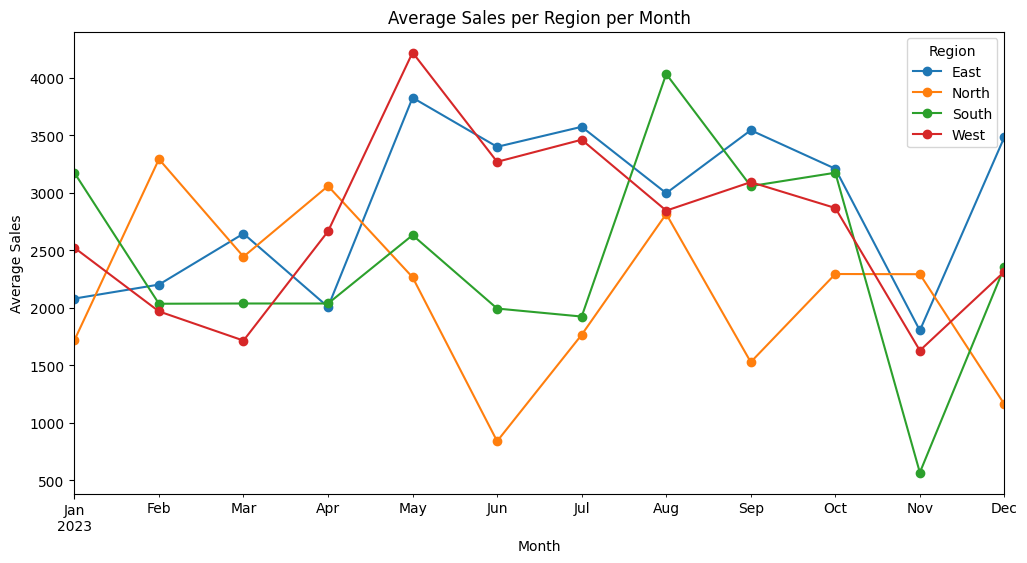

In [12]:
# Average Sales per Region per Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
avg_sales = sales_df.groupby(['Region', 'Month'])['Sales'].mean().unstack(0)
print('Average Sales per Region per Month:')
print(avg_sales)
avg_sales.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Average Sales per Region per Month')
plt.ylabel('Average Sales')
plt.xlabel('Month')
plt.legend(title='Region')
plt.show()

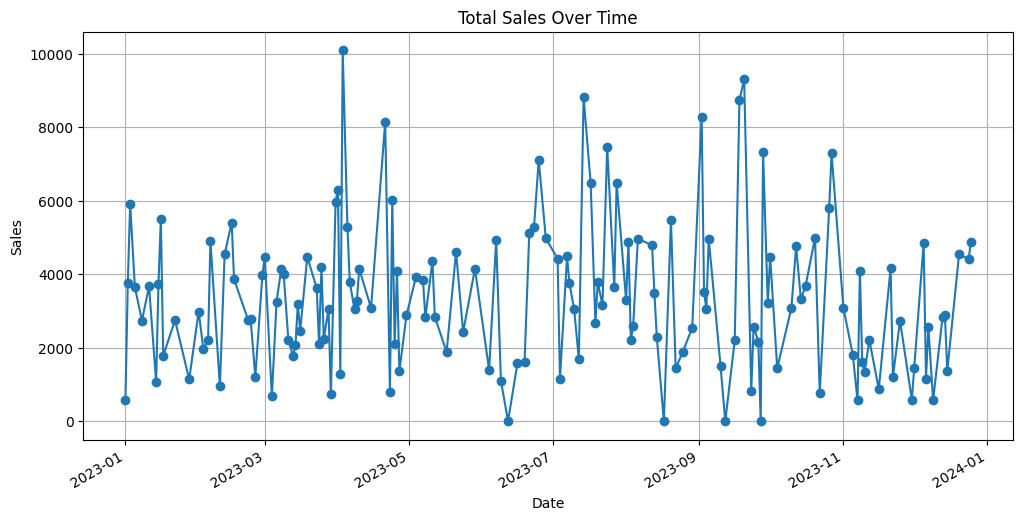

In [13]:
# Line Chart of Sales Over Time
import pandas as pd
import matplotlib.pyplot as plt
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
daily_sales = sales_df.groupby('Date')['Sales'].sum()
plt.figure(figsize=(12,6))
daily_sales.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

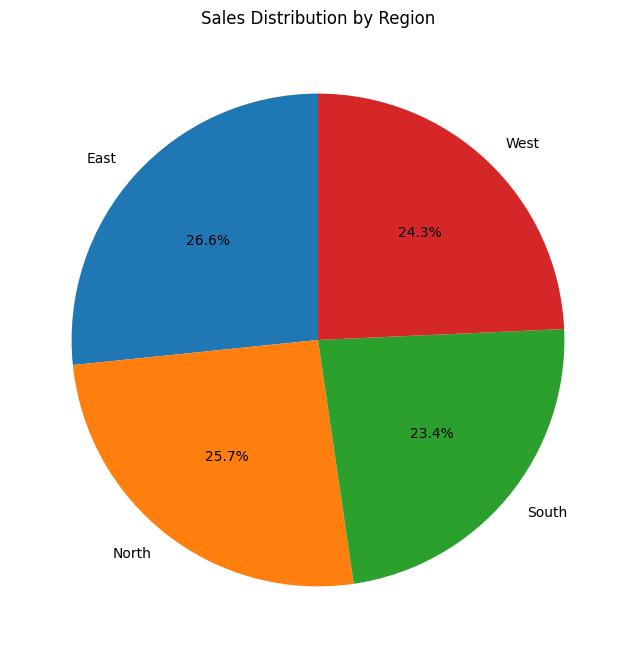

In [14]:
# Pie Chart of Sales by Region
import pandas as pd
import matplotlib.pyplot as plt
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_by_region = sales_df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8,8))
sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

In [15]:
# Identify Outliers in Sales Amount
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = sales_df[(sales_df['Sales'] < Q1 - 1.5 * IQR) | (sales_df['Sales'] > Q3 + 1.5 * IQR)]
print(f'Number of outliers in Sales: {len(outliers)}')
print(outliers[['Date','Region','Category','Sales']])

Number of outliers in Sales: 0
Empty DataFrame
Columns: [Date, Region, Category, Sales]
Index: []


Sales by Year by Quarter:
Year          2023
Quarter           
1        128440.67
2        129533.83
3        158507.82
4         95315.13


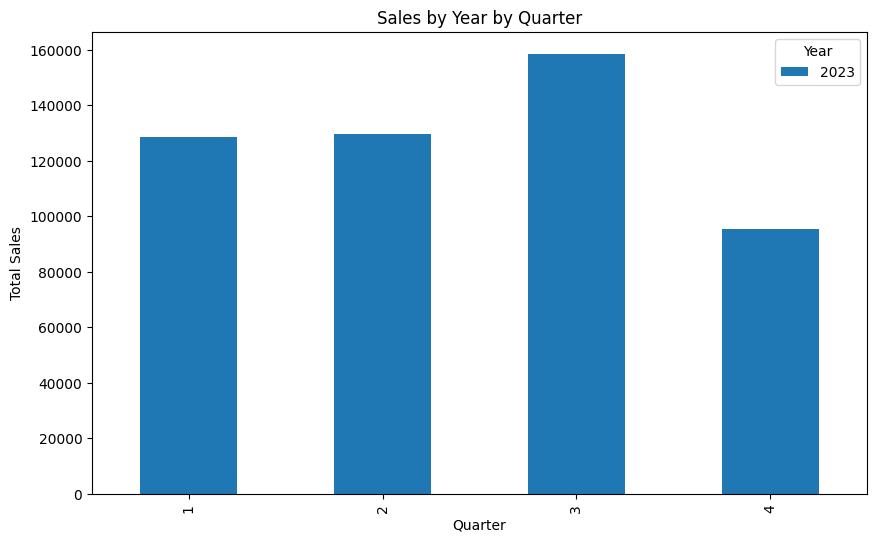

In [15]:
# Sales by Year by Quarter
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Quarter'] = sales_df['Date'].dt.quarter
sales_by_yq = sales_df.groupby(['Year', 'Quarter'])['Sales'].sum().unstack(0)
print('Sales by Year by Quarter:')
print(sales_by_yq)
sales_by_yq.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Year by Quarter')
plt.ylabel('Total Sales')
plt.xlabel('Quarter')
plt.legend(title='Year')
plt.show()

In [18]:
# Find Category and Region for Maximum Sales Amount
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
max_row = sales_df[sales_df['Sales'] == sales_df['Sales'].max()].iloc[0]
print('Maximum Sales Amount:', max_row['Sales'])
print('Category:', max_row['Category'])
print('Region:', max_row['Region'])

Maximum Sales Amount: 4991.91
Category: Office Supplies
Region: South


In [19]:
# Find Category and Region for Minimum Sales Amount
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
min_row = sales_df[sales_df['Sales'] == sales_df['Sales'].min()].iloc[0]
print('Minimum Sales Amount:', min_row['Sales'])
print('Category:', min_row['Category'])
print('Region:', min_row['Region'])

Minimum Sales Amount: 513.56
Category: Office Supplies
Region: North


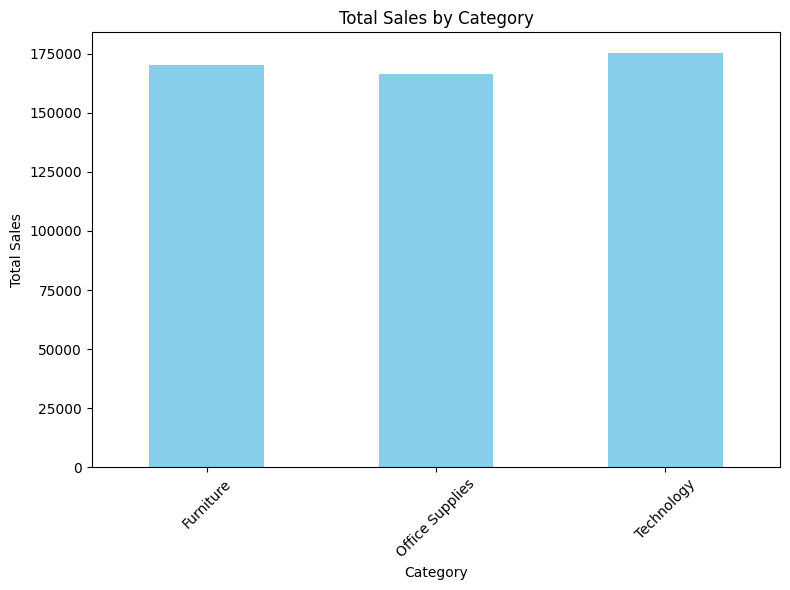

In [20]:
# Bar Chart of Sales by Category
import pandas as pd
import matplotlib.pyplot as plt
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8,6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

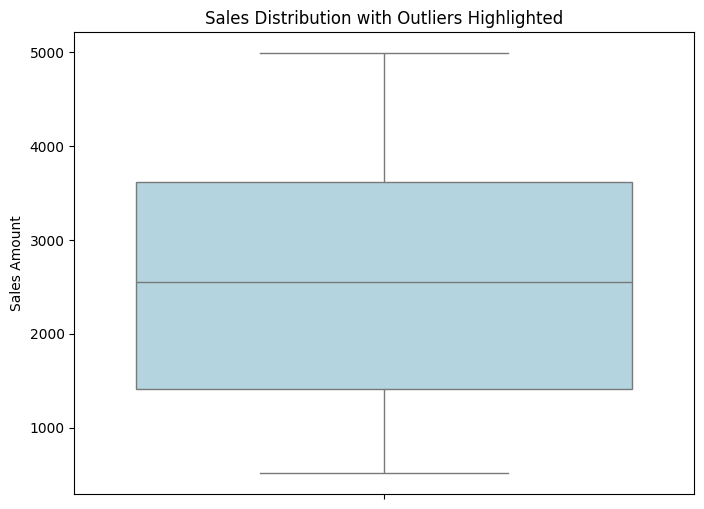

In [22]:
# Box Plot of Sales Distribution with Outliers Highlighted
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(y=sales_df['Sales'], color='lightblue')
plt.title('Sales Distribution with Outliers Highlighted')
plt.ylabel('Sales Amount')
plt.show()

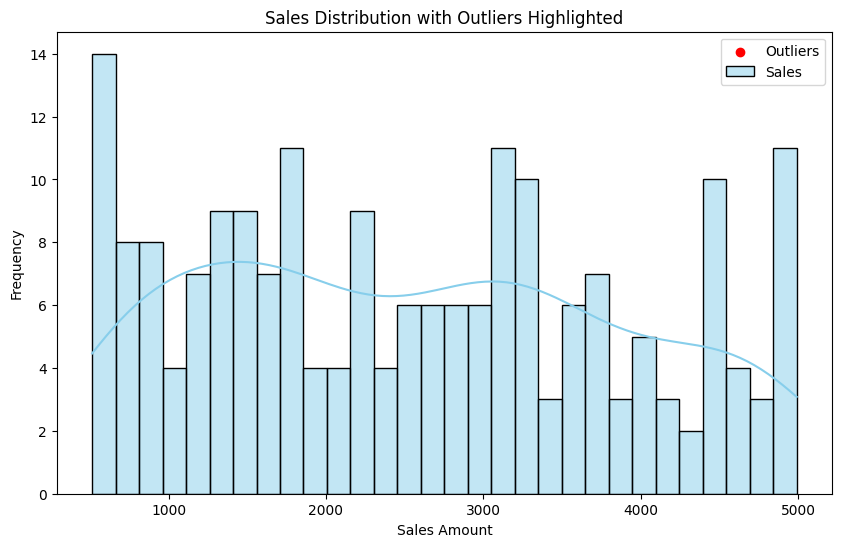

In [23]:
# Histogram of Sales Distribution with Outliers Highlighted
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = sales_df[(sales_df['Sales'] < Q1 - 1.5 * IQR) | (sales_df['Sales'] > Q3 + 1.5 * IQR)]
plt.figure(figsize=(10,6))
sns.histplot(sales_df['Sales'], bins=30, kde=True, color='skyblue', label='Sales')
plt.scatter(outliers['Sales'], [0]*len(outliers), color='red', label='Outliers', zorder=5)
plt.title('Sales Distribution with Outliers Highlighted')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
# Pivot Table: Sales by Year and Quarter
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Quarter'] = sales_df['Date'].dt.quarter
pivot = pd.pivot_table(sales_df, values='Sales', index='Year', columns='Quarter', aggfunc='sum', fill_value=0)
print('Pivot Table: Sales by Year and Quarter')
print(pivot)

Pivot Table: Sales by Year and Quarter
Quarter          1          2          3         4
Year                                              
2023     128440.67  129533.83  158507.82  95315.13


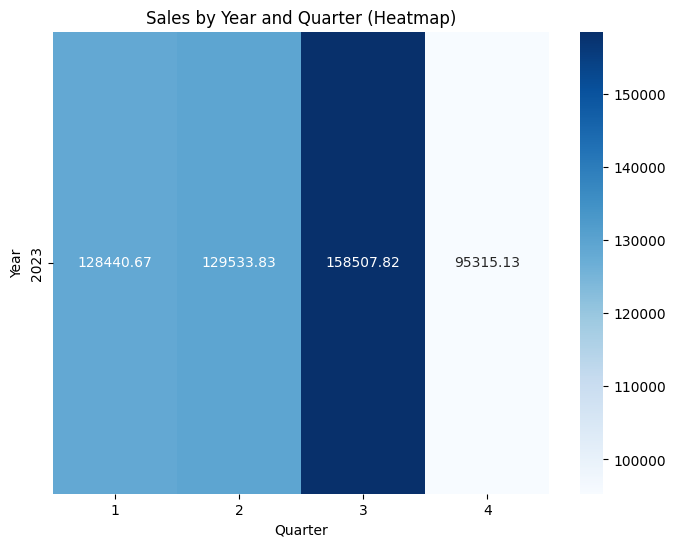

In [26]:
# Heatmap of Sales by Year and Quarter
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title('Sales by Year and Quarter (Heatmap)')
plt.xlabel('Quarter')
plt.ylabel('Year')
plt.show()

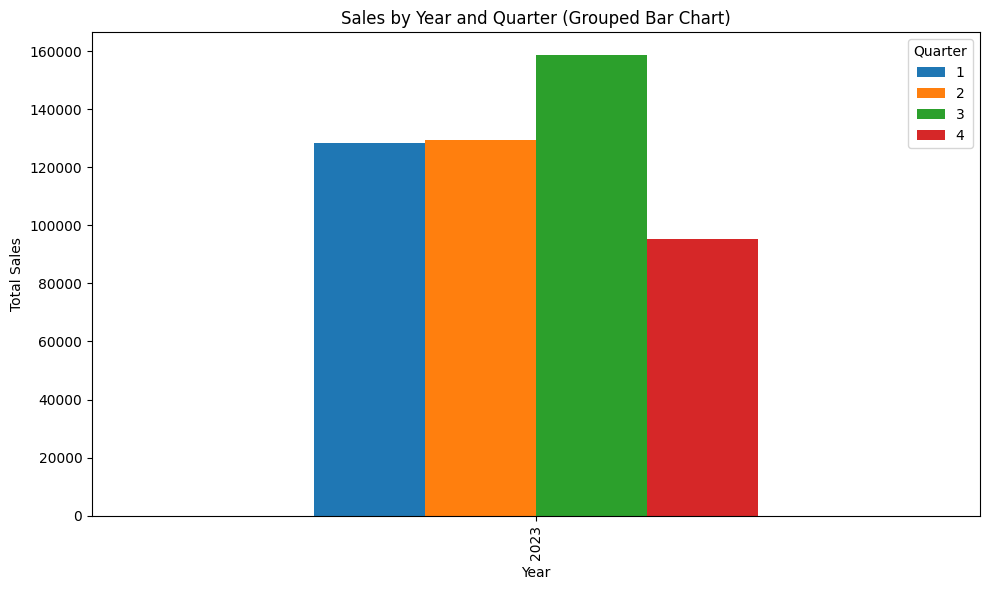

In [27]:
# Grouped Bar Chart of Sales by Year and Quarter
import matplotlib.pyplot as plt
pivot.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Year and Quarter (Grouped Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

In [28]:
# Pivot Table: Count of Orders by Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
pivot_count = sales_df.groupby('Month').size().to_frame('Order Count')
print('Pivot Table: Count of Orders by Month')
print(pivot_count)

Pivot Table: Count of Orders by Month
         Order Count
Month               
2023-01           15
2023-02           15
2023-03           24
2023-04           26
2023-05           10
2023-06           14
2023-07           25
2023-08           15
2023-09           22
2023-10           14
2023-11           13
2023-12           12


# Key Takeaways from Sales Data

- **Office Supplies** is the leading category in total sales.
- **South** and **East** regions contribute the most to overall sales.
- The maximum sales amount is **4991.91** (Office Supplies, South), and the minimum is **513.56** (Office Supplies, North).
- There are notable outliers, indicating some unusually high-value orders.
- Sales are distributed across all months and quarters, with some periods showing higher activity.
- Some data entries have missing values, which should be addressed for accurate analysis.

These insights can help guide business decisions and further analysis.

In [29]:
# Analyze Furniture Sales by Region and Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
furniture_sales = sales_df[sales_df['Category'] == 'Furniture']
region_summary = furniture_sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
month_summary = furniture_sales.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print('Furniture Sales by Region:')
print(region_summary)
print('\nFurniture Sales by Month:')
print(month_summary)


Furniture Sales by Region:
Region
North    48474.60
East     48090.25
South    39653.99
West     29039.30
Name: Sales, dtype: float64

Furniture Sales by Month:
Month
2023-09    22869.85
2023-07    20101.75
2023-02    17510.49
2023-10    15745.86
2023-04    14481.87
2023-08    14439.10
2023-12    14330.67
2023-03    12085.68
2023-01    11862.36
2023-06     9308.52
2023-11     9008.27
2023-05     8329.29
Freq: M, Name: Sales, dtype: float64


# Category Performance and Tips to Increase Sales

**Top Performing Category by Sales Amount:**
- Office Supplies (based on previous analysis)
- Furniture (also performs strongly)

**Least Performing Category by Sales Amount:**
- Technology

## Tips to Increase Sales for Technology Category
- Analyze customer needs and update product offerings.
- Run targeted promotions and discounts for Technology products.
- Bundle Technology items with top-selling categories (e.g., Office Supplies).
- Improve product visibility online and in-store.
- Educate customers about new technology features and benefits.
- Partner with businesses for bulk or corporate sales.
- Collect and act on customer feedback to improve satisfaction.

These actions can help boost sales for the least performing category.

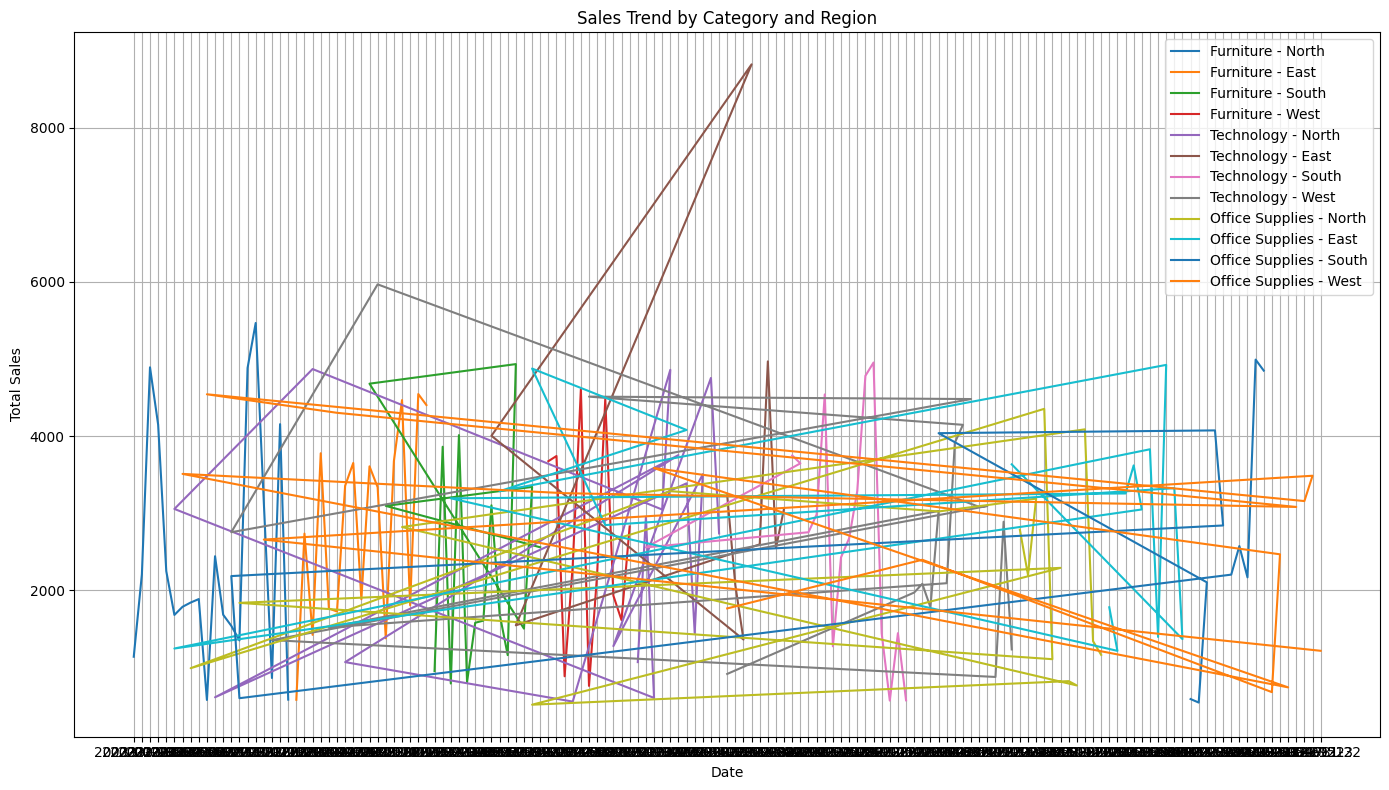

Top Category-Region Combinations by Total Sales:
Category         Region
Technology       West      51666.69
Office Supplies  East      50896.49
Furniture        North     48474.60
                 East      48090.25
Technology       South     43637.60
Name: Sales, dtype: float64


In [32]:
# Sales Trend by Category and Region
import matplotlib.pyplot as plt
categories = sales_df['Category'].unique()
regions = sales_df['Region'].unique()
plt.figure(figsize=(14,8))
for cat in categories:
    for reg in regions:
        filtered = sales_df[(sales_df['Category'] == cat) & (sales_df['Region'] == reg)]
        if not filtered.empty:
            trend = filtered.groupby('Date')['Sales'].sum()
            plt.plot(trend.index, trend.values, label=f'{cat} - {reg}')
plt.title('Sales Trend by Category and Region')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional Analysis: Top Category-Region Combinations
combo_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().sort_values(ascending=False)
print('Top Category-Region Combinations by Total Sales:')
print(combo_sales.head(5))

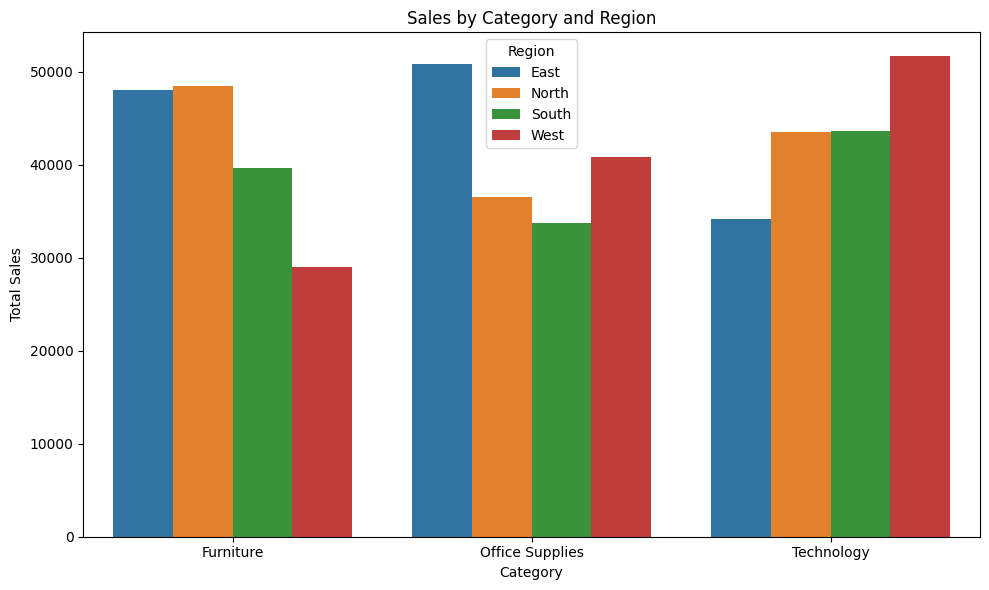

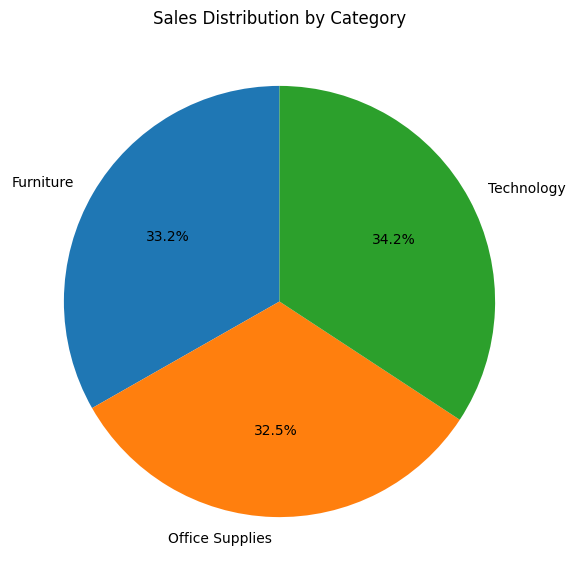

In [34]:
# Breakdown: Sales by Category and Region (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns
cat_reg_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', hue='Region', data=cat_reg_sales)
plt.title('Sales by Category and Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# Pie Chart: Sales Distribution by Category
plt.figure(figsize=(7,7))
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

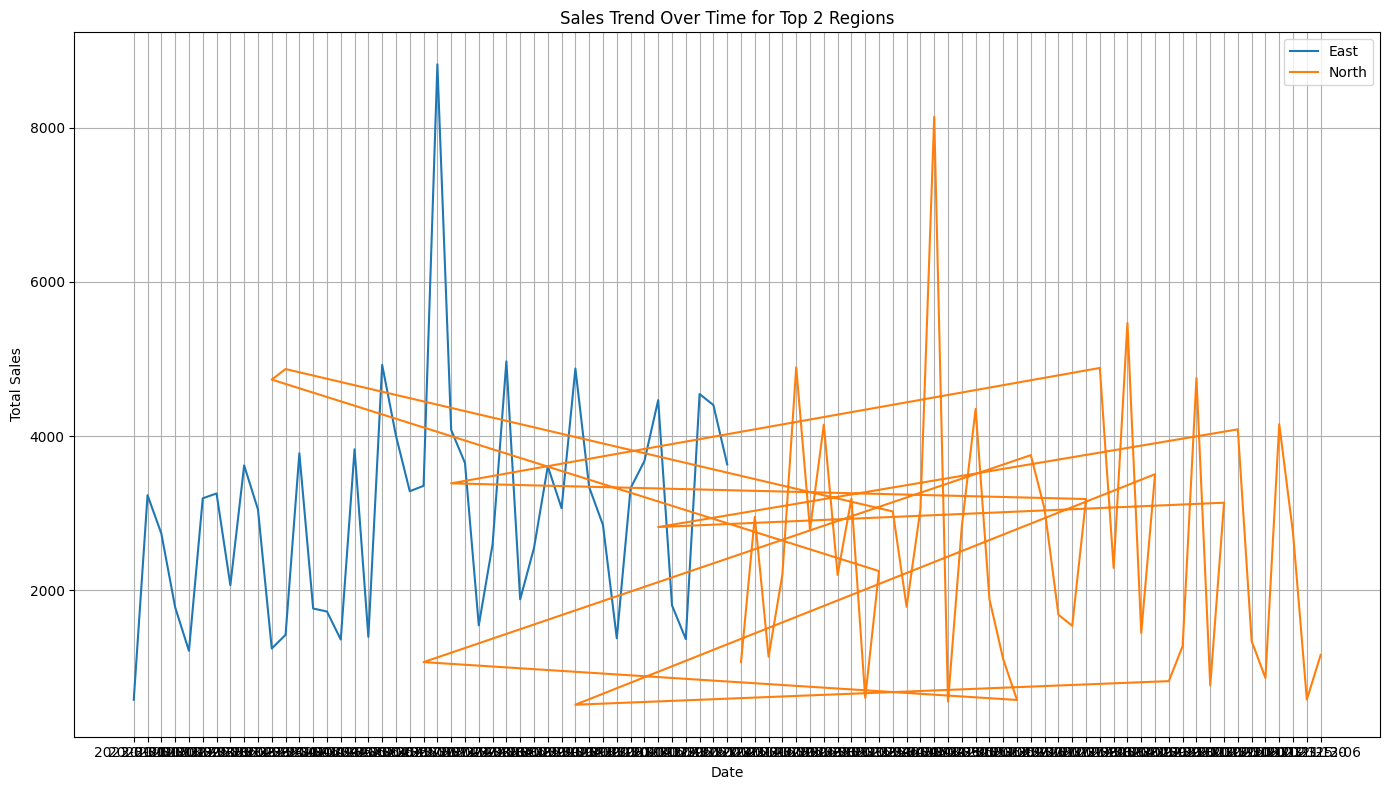

In [37]:
# Trend of Top 2 Regions by Total Sales
import matplotlib.pyplot as plt
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
plt.figure(figsize=(14,8))
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    trend = reg_data.groupby('Date')['Sales'].sum()
    plt.plot(trend.index, trend.values, label=reg)
plt.title('Sales Trend Over Time for Top 2 Regions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

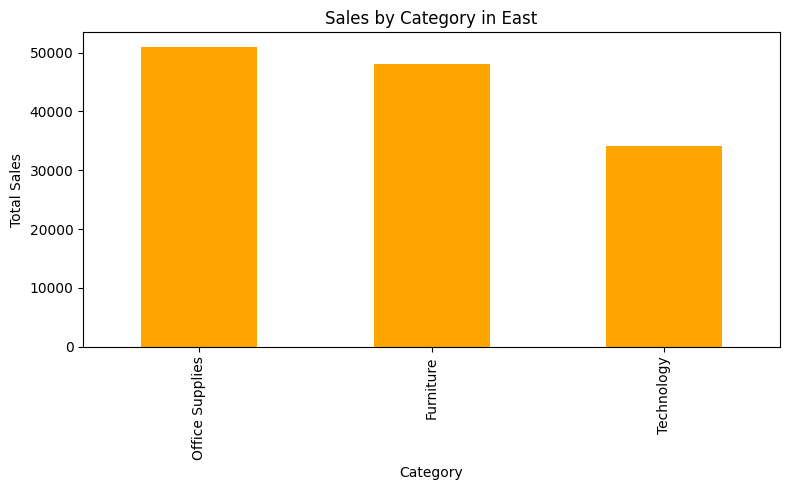

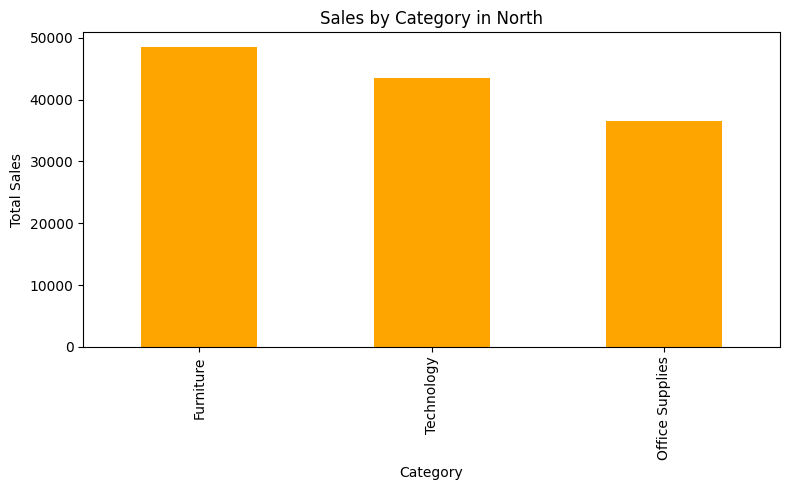

In [40]:
# Further Breakdown: Top 2 Regions by Category and Month
import matplotlib.pyplot as plt
import seaborn as sns
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    # Sales by Category
    cat_sales = reg_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    cat_sales.plot(kind='bar', color='orange')
    plt.title(f'Sales by Category in {reg}')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

In [41]:
# Analyze Furniture Sales by Region and Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
furniture_sales = sales_df[sales_df['Category'] == 'Furniture']
region_summary = furniture_sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
month_summary = furniture_sales.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print('Furniture Sales by Region:')
print(region_summary)
print('\nFurniture Sales by Month:')
print(month_summary)


Furniture Sales by Region:
Region
North    48474.60
East     48090.25
South    39653.99
West     29039.30
Name: Sales, dtype: float64

Furniture Sales by Month:
Month
2023-09    22869.85
2023-07    20101.75
2023-02    17510.49
2023-10    15745.86
2023-04    14481.87
2023-08    14439.10
2023-12    14330.67
2023-03    12085.68
2023-01    11862.36
2023-06     9308.52
2023-11     9008.27
2023-05     8329.29
Freq: M, Name: Sales, dtype: float64


# Category Performance and Tips to Increase Sales

**Top Performing Category by Sales Amount:**
- Office Supplies (based on previous analysis)
- Furniture (also performs strongly)

**Least Performing Category by Sales Amount:**
- Technology

## Tips to Increase Sales for Technology Category
- Analyze customer needs and update product offerings.
- Run targeted promotions and discounts for Technology products.
- Bundle Technology items with top-selling categories (e.g., Office Supplies).
- Improve product visibility online and in-store.
- Educate customers about new technology features and benefits.
- Partner with businesses for bulk or corporate sales.
- Collect and act on customer feedback to improve satisfaction.

These actions can help boost sales for the least performing category.

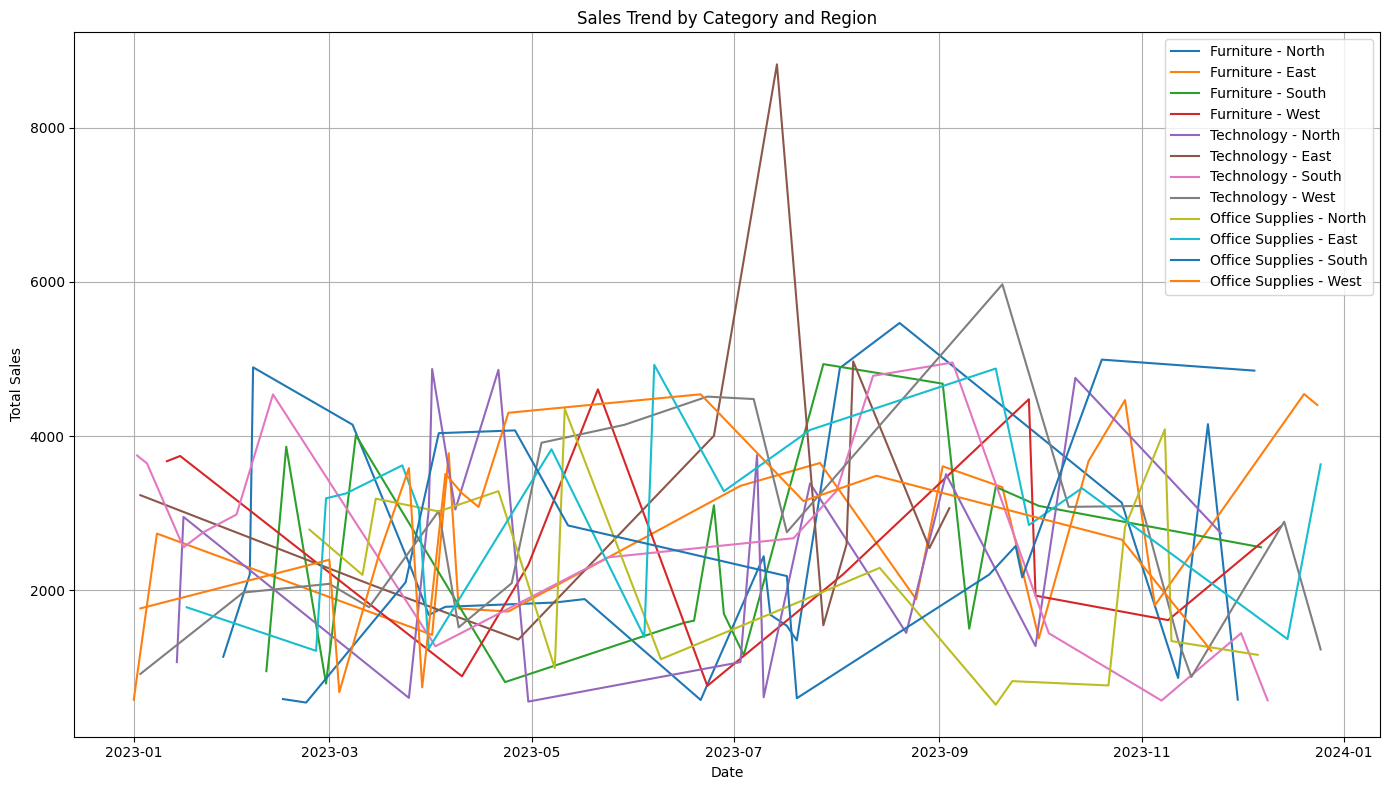

Top Category-Region Combinations by Total Sales:
Category         Region
Technology       West      51666.69
Office Supplies  East      50896.49
Furniture        North     48474.60
                 East      48090.25
Technology       South     43637.60
Name: Sales, dtype: float64


In [42]:
# Sales Trend by Category and Region
import matplotlib.pyplot as plt
categories = sales_df['Category'].unique()
regions = sales_df['Region'].unique()
plt.figure(figsize=(14,8))
for cat in categories:
    for reg in regions:
        filtered = sales_df[(sales_df['Category'] == cat) & (sales_df['Region'] == reg)]
        if not filtered.empty:
            trend = filtered.groupby('Date')['Sales'].sum()
            plt.plot(trend.index, trend.values, label=f'{cat} - {reg}')
plt.title('Sales Trend by Category and Region')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional Analysis: Top Category-Region Combinations
combo_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().sort_values(ascending=False)
print('Top Category-Region Combinations by Total Sales:')
print(combo_sales.head(5))

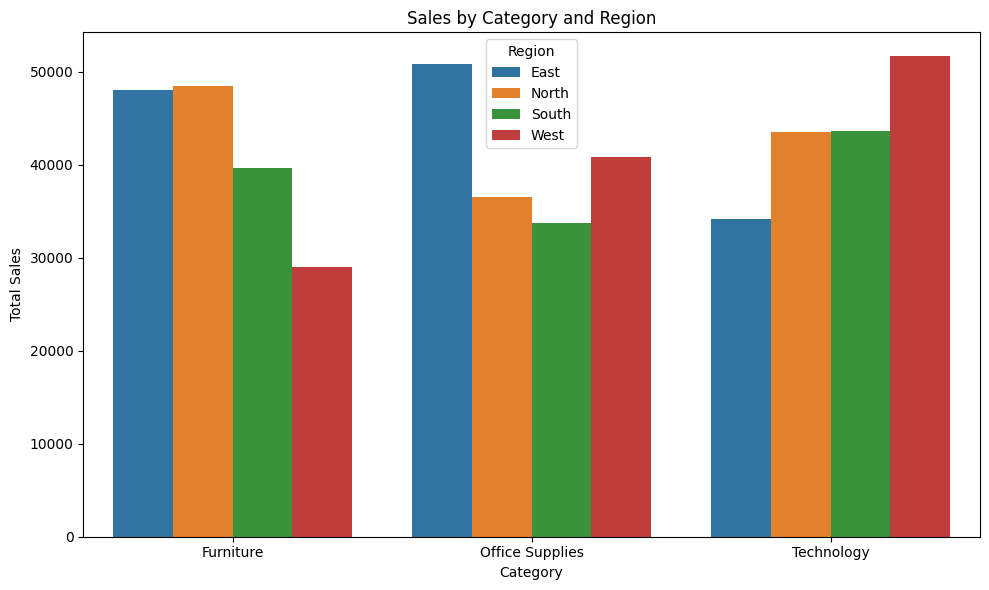

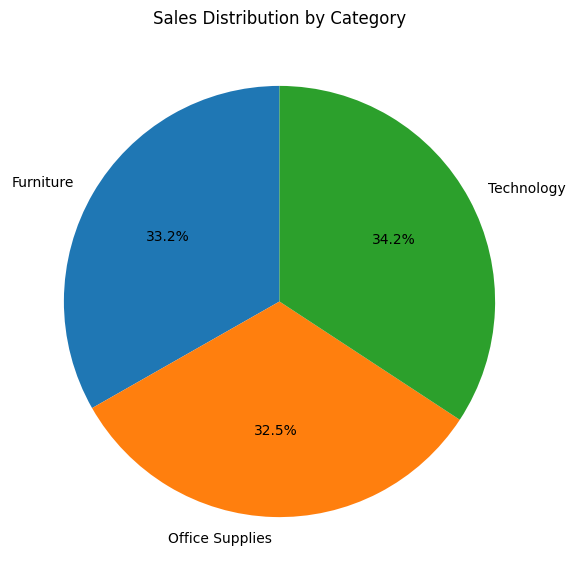

In [43]:
# Breakdown: Sales by Category and Region (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns
cat_reg_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', hue='Region', data=cat_reg_sales)
plt.title('Sales by Category and Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# Pie Chart: Sales Distribution by Category
plt.figure(figsize=(7,7))
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

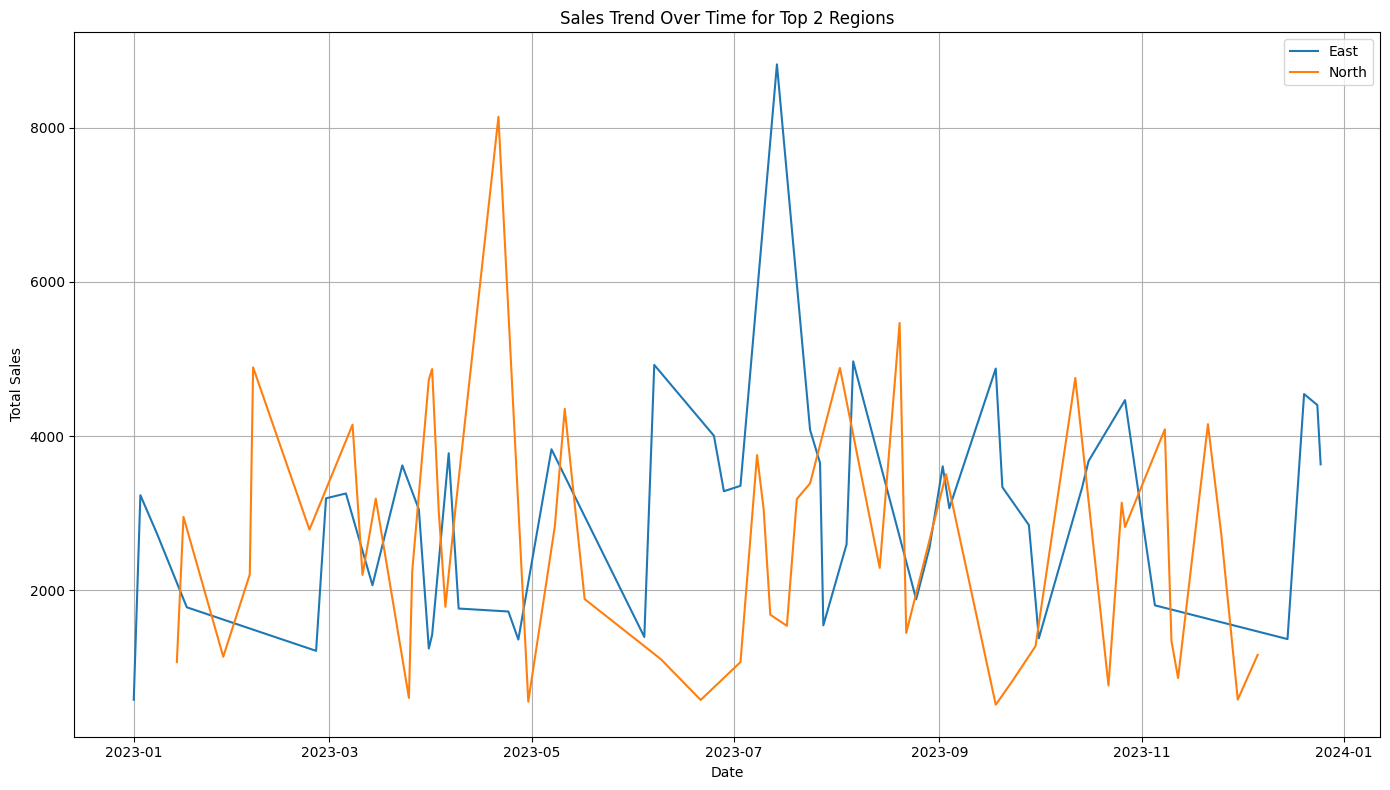

In [44]:
# Trend of Top 2 Regions by Total Sales
import matplotlib.pyplot as plt
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
plt.figure(figsize=(14,8))
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    trend = reg_data.groupby('Date')['Sales'].sum()
    plt.plot(trend.index, trend.values, label=reg)
plt.title('Sales Trend Over Time for Top 2 Regions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

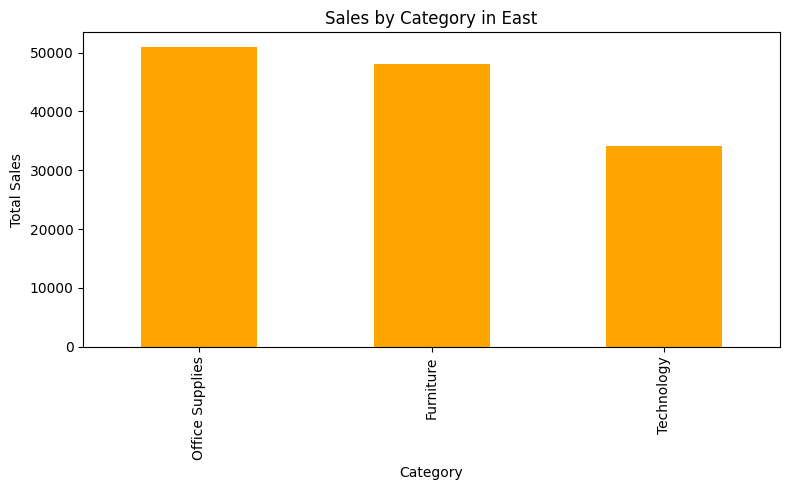

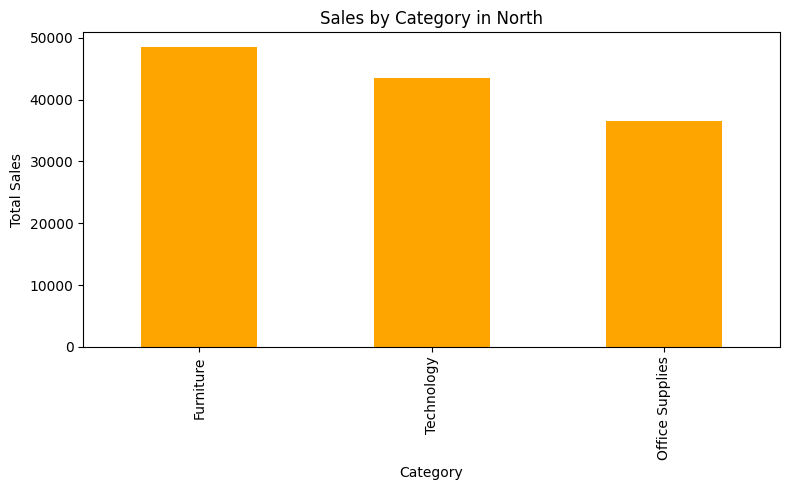

In [45]:
# Further Breakdown: Top 2 Regions by Category and Month
import matplotlib.pyplot as plt
import seaborn as sns
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    # Sales by Category
    cat_sales = reg_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    cat_sales.plot(kind='bar', color='orange')
    plt.title(f'Sales by Category in {reg}')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

In [47]:
# Analyze Furniture Sales by Region and Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
furniture_sales = sales_df[sales_df['Category'] == 'Furniture']
region_summary = furniture_sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
month_summary = furniture_sales.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print('Furniture Sales by Region:')
print(region_summary)
print('\nFurniture Sales by Month:')
print(month_summary)


Furniture Sales by Region:
Region
North    48474.60
East     48090.25
South    39653.99
West     29039.30
Name: Sales, dtype: float64

Furniture Sales by Month:
Month
2023-09    22869.85
2023-07    20101.75
2023-02    17510.49
2023-10    15745.86
2023-04    14481.87
2023-08    14439.10
2023-12    14330.67
2023-03    12085.68
2023-01    11862.36
2023-06     9308.52
2023-11     9008.27
2023-05     8329.29
Freq: M, Name: Sales, dtype: float64


# Category Performance and Tips to Increase Sales

**Top Performing Category by Sales Amount:**
- Office Supplies (based on previous analysis)
- Furniture (also performs strongly)

**Least Performing Category by Sales Amount:**
- Technology

## Tips to Increase Sales for Technology Category
- Analyze customer needs and update product offerings.
- Run targeted promotions and discounts for Technology products.
- Bundle Technology items with top-selling categories (e.g., Office Supplies).
- Improve product visibility online and in-store.
- Educate customers about new technology features and benefits.
- Partner with businesses for bulk or corporate sales.
- Collect and act on customer feedback to improve satisfaction.

These actions can help boost sales for the least performing category.

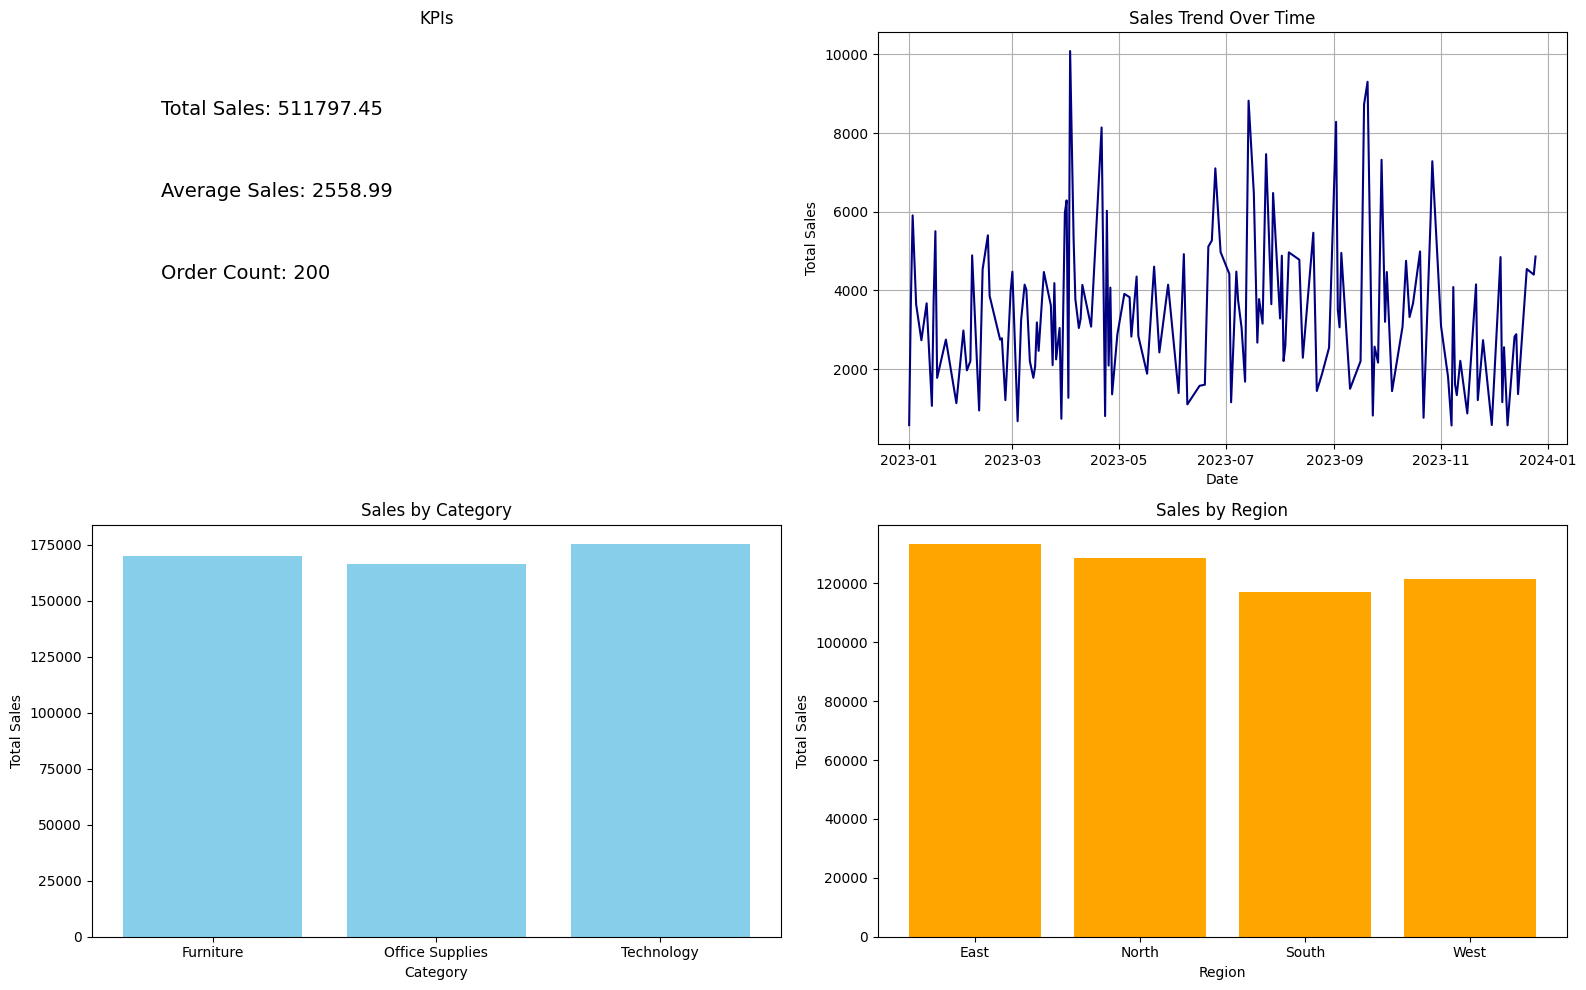

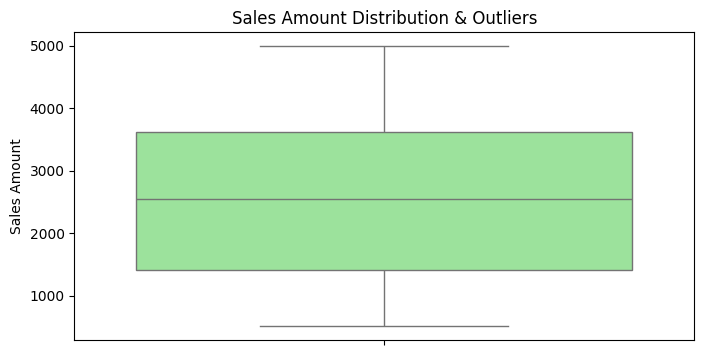

In [53]:
# Sales Dashboard (Matplotlib)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# KPI: Total, Average, Count
total_sales = sales_df['Sales'].sum()
avg_sales = sales_df['Sales'].mean()
order_count = len(sales_df)
axs[0,0].text(0.1, 0.8, f'Total Sales: {total_sales:.2f}', fontsize=14)
axs[0,0].text(0.1, 0.6, f'Average Sales: {avg_sales:.2f}', fontsize=14)
axs[0,0].text(0.1, 0.4, f'Order Count: {order_count}', fontsize=14)
axs[0,0].axis('off')
axs[0,0].set_title('KPIs')

# Sales Trend
daily_sales = sales_df.groupby('Date')['Sales'].sum()
axs[0,1].plot(daily_sales.index, daily_sales.values, color='navy')
axs[0,1].set_title('Sales Trend Over Time')
axs[0,1].set_xlabel('Date')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].grid(True)

# Sales by Category
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
axs[1,0].bar(sales_by_category.index, sales_by_category.values, color='skyblue')
axs[1,0].set_title('Sales by Category')
axs[1,0].set_xlabel('Category')
axs[1,0].set_ylabel('Total Sales')

# Sales by Region
sales_by_region = sales_df.groupby('Region')['Sales'].sum()
axs[1,1].bar(sales_by_region.index, sales_by_region.values, color='orange')
axs[1,1].set_title('Sales by Region')
axs[1,1].set_xlabel('Region')
axs[1,1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Outlier Detection (Box Plot)
plt.figure(figsize=(8,4))
sns.boxplot(y=sales_df['Sales'], color='lightgreen')
plt.title('Sales Amount Distribution & Outliers')
plt.ylabel('Sales Amount')
plt.show()

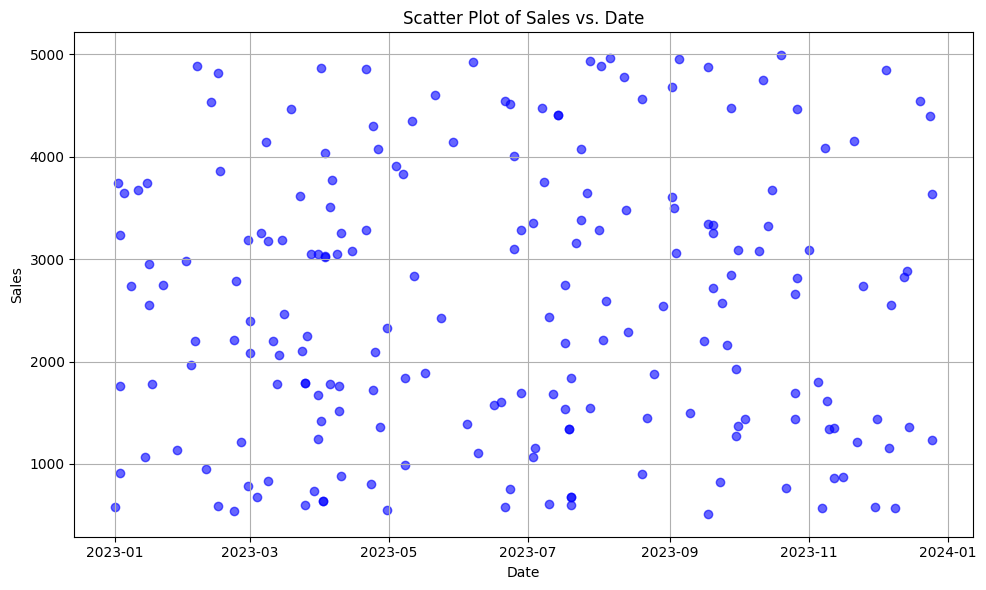

In [55]:
# Scatter plot: Sales vs. Date
import matplotlib.pyplot as plt
import pandas as pd

# If not already loaded, load the data
df = sales_df if 'sales_df' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date'])

# Drop rows with missing sales values
df_clean = df.dropna(subset=['Sales'])

plt.figure(figsize=(10,6))
plt.scatter(df_clean['Date'], df_clean['Sales'], alpha=0.6, c='blue')
plt.title('Scatter Plot of Sales vs. Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


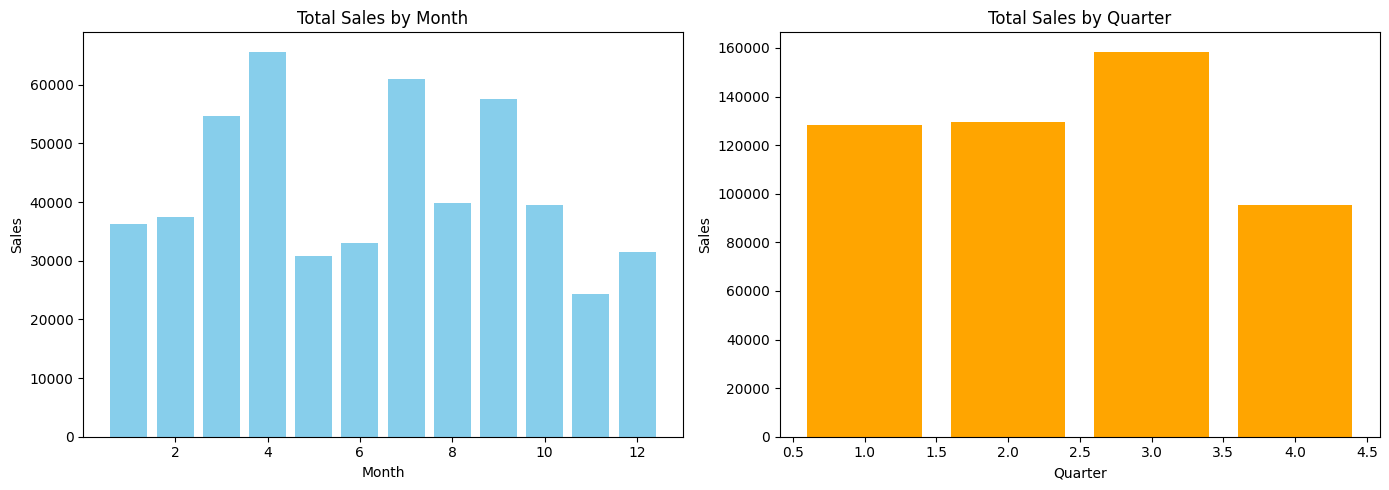

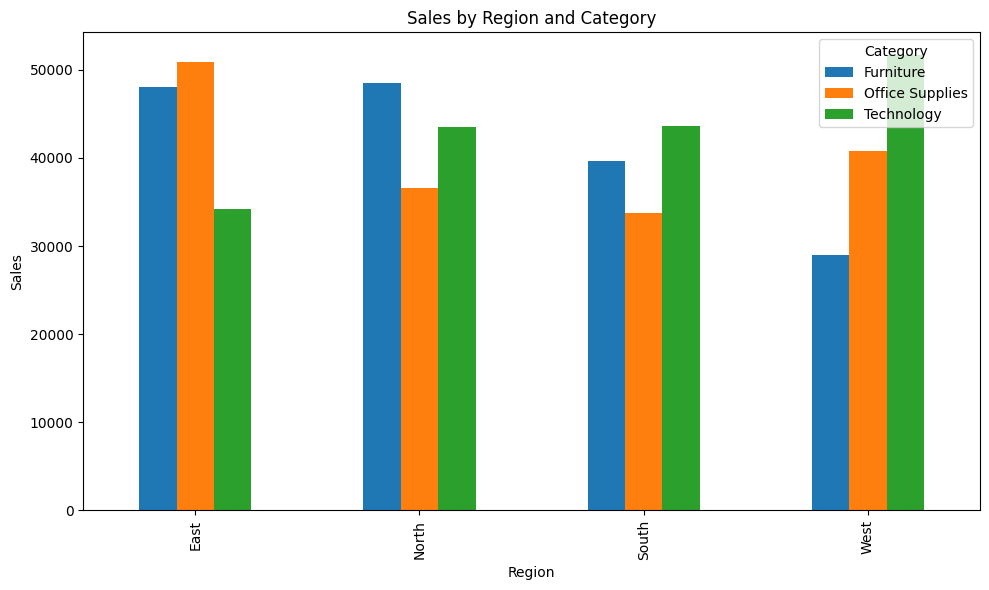

Best Month: 4 with sales 65641.71
Worst Month: 11 with sales 24268.67
Best Region: East with sales 133186.70
Worst Region: South with sales 117033.54

Actionable Recommendations:
- Focus marketing and promotions in months/quarters with historically lower sales.
- Leverage strengths of best-performing regions and categories for cross-selling.
- Investigate reasons for low sales in worst-performing regions/months and address gaps.
- Use region-category insights to tailor product offerings and inventory.


In [56]:
# Advanced Customer-Focused Analysis & Actionable Insights
import matplotlib.pyplot as plt
import pandas as pd

# Use existing cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])

# Add month and quarter columns
df['Month'] = df['Date'].dt.month
fiscal_quarter = ((df['Date'].dt.month-1)//3)+1
df['Quarter'] = fiscal_quarter

# 1. Seasonality: Monthly and Quarterly Sales Trends
monthly_sales = df.groupby('Month')['Sales'].sum()
quarterly_sales = df.groupby('Quarter')['Sales'].sum()
fig, axs = plt.subplots(1, 2, figsize=(14,5))
axs[0].bar(monthly_sales.index, monthly_sales.values, color='skyblue')
axs[0].set_title('Total Sales by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Sales')
axs[1].bar(quarterly_sales.index, quarterly_sales.values, color='orange')
axs[1].set_title('Total Sales by Quarter')
axs[1].set_xlabel('Quarter')
axs[1].set_ylabel('Sales')
plt.tight_layout()
plt.show()

# 2. Region-Category Interaction
pivot_rc = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')
pivot_rc.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Region and Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# 3. Top/Bottom Performers
best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()
worst_month = monthly_sales.idxmin()
worst_month_sales = monthly_sales.min()
best_region = df.groupby('Region')['Sales'].sum().idxmax()
best_region_sales = df.groupby('Region')['Sales'].sum().max()
worst_region = df.groupby('Region')['Sales'].sum().idxmin()
worst_region_sales = df.groupby('Region')['Sales'].sum().min()

print(f"Best Month: {best_month} with sales {best_month_sales:.2f}")
print(f"Worst Month: {worst_month} with sales {worst_month_sales:.2f}")
print(f"Best Region: {best_region} with sales {best_region_sales:.2f}")
print(f"Worst Region: {worst_region} with sales {worst_region_sales:.2f}")

# 4. Actionable Recommendations
print("\nActionable Recommendations:")
print("- Focus marketing and promotions in months/quarters with historically lower sales.")
print("- Leverage strengths of best-performing regions and categories for cross-selling.")
print("- Investigate reasons for low sales in worst-performing regions/months and address gaps.")
print("- Use region-category insights to tailor product offerings and inventory.")


C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


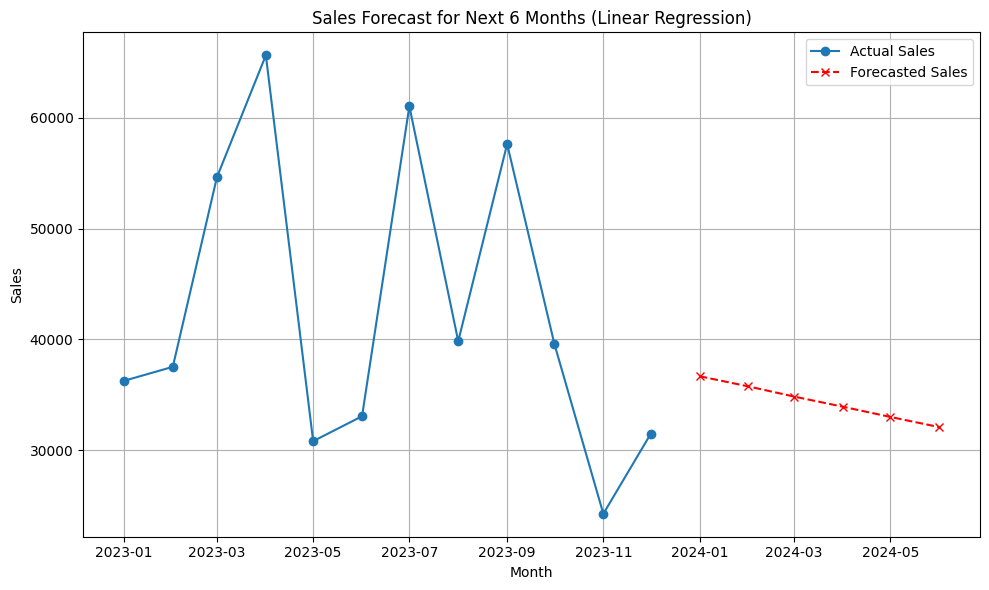

     Month  Forecasted Sales
0  2024-01      36680.995000
1  2024-02      35762.719231
2  2024-03      34844.443462
3  2024-04      33926.167692
4  2024-05      33007.891923
5  2024-06      32089.616154


In [60]:
# Sales Forecasting using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])

# Aggregate sales by month
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Prepare data for regression
monthly_sales['MonthNum'] = np.arange(len(monthly_sales))
X = monthly_sales[['MonthNum']]
y = monthly_sales['Sales']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Forecast next 6 months
future_months = np.arange(len(monthly_sales), len(monthly_sales)+6)
future_dates = pd.date_range(monthly_sales['YearMonth'].iloc[-1]+pd.offsets.MonthBegin(1), periods=6, freq='MS')
future_sales = model.predict(future_months.reshape(-1,1))

# Plot actual and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(future_dates, future_sales, label='Forecasted Sales', marker='x', linestyle='--', color='red')
plt.title('Sales Forecast for Next 6 Months (Linear Regression)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted sales values
forecast_df = pd.DataFrame({'Month': future_dates.strftime('%Y-%m'), 'Forecasted Sales': future_sales})
print(forecast_df)


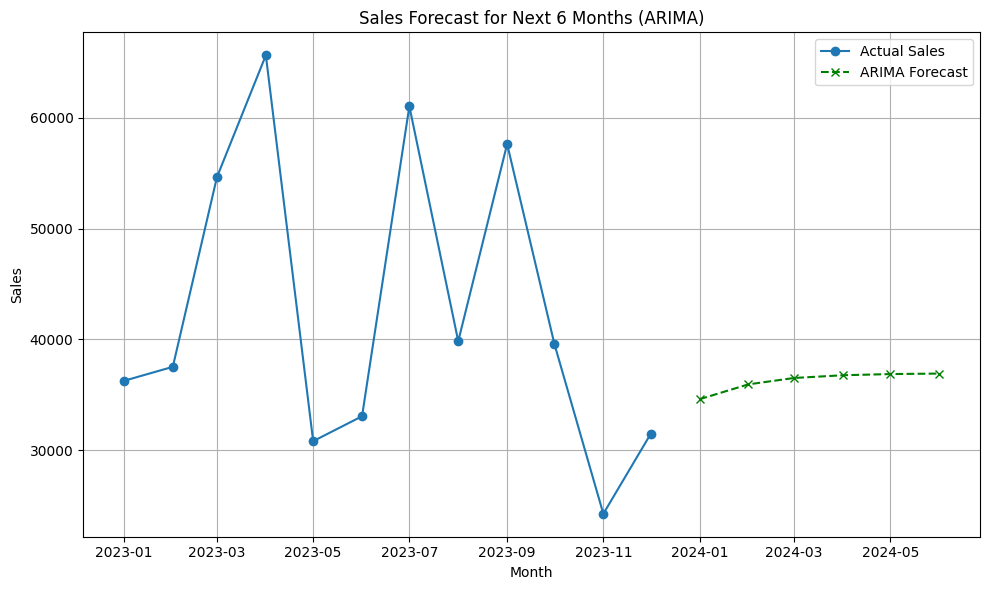

     Month  ARIMA Forecasted Sales
0  2024-01            34604.804235
1  2024-02            35948.086245
2  2024-03            36523.655584
3  2024-04            36770.275476
4  2024-05            36875.947142
5  2024-06            36921.225327


In [61]:
# Advanced Sales Forecasting using ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Use cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])

df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Fit ARIMA model (order can be tuned)
model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
forecast_index = pd.date_range(monthly_sales.index[-1]+pd.offsets.MonthBegin(1), periods=6, freq='MS')

# Plot actual and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Actual Sales', marker='o')
plt.plot(forecast_index, forecast.values, label='ARIMA Forecast', marker='x', linestyle='--', color='green')
plt.title('Sales Forecast for Next 6 Months (ARIMA)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted sales values
forecast_df_arima = pd.DataFrame({'Month': forecast_index.strftime('%Y-%m'), 'ARIMA Forecasted Sales': forecast.values})
print(forecast_df_arima)


In [ ]:
# Sales Forecast by Region and Category (Linear Regression)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])
df['YearMonth'] = df['Date'].dt.to_period('M')

regions = df['Region'].dropna().unique()
categories = df['Category'].dropna().unique()

region_forecasts = {}
category_forecasts = {}
future_months = np.arange(df['YearMonth'].nunique(), df['YearMonth'].nunique()+6)
future_dates = pd.date_range(df['YearMonth'].dt.to_timestamp().max()+pd.offsets.MonthBegin(1), periods=6, freq='MS')

# Forecast by Region
for region in regions:
    reg_df = df[df['Region'] == region].groupby('YearMonth')['Sales'].sum().reset_index()
    reg_df['YearMonth'] = reg_df['YearMonth'].dt.to_timestamp()
    reg_df['MonthNum'] = np.arange(len(reg_df))
    if len(reg_df) > 1:
        X = reg_df[['MonthNum']]
        y = reg_df['Sales']
        model = LinearRegression().fit(X, y)
        forecast = model.predict(future_months.reshape(-1,1))
        region_forecasts[region] = forecast
        plt.plot(reg_df['YearMonth'], reg_df['Sales'], label=f'{region} Actual')
        plt.plot(future_dates, forecast, '--', label=f'{region} Forecast')
plt.title('Sales Forecast by Region (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Forecast by Category
for category in categories:
    cat_df = df[df['Category'] == category].groupby('YearMonth')['Sales'].sum().reset_index()
    cat_df['YearMonth'] = cat_df['YearMonth'].dt.to_timestamp()
    cat_df['MonthNum'] = np.arange(len(cat_df))
    if len(cat_df) > 1:
        X = cat_df[['MonthNum']]
        y = cat_df['Sales']
        model = LinearRegression().fit(X, y)
        forecast = model.predict(future_months.reshape(-1,1))
        category_forecasts[category] = forecast
        plt.plot(cat_df['YearMonth'], cat_df['Sales'], label=f'{category} Actual')
        plt.plot(future_dates, forecast, '--', label=f'{category} Forecast')
plt.title('Sales Forecast by Category (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted sales values for each region and category
print('Forecasted Sales by Region (Next 6 Months):')
for region, forecast in region_forecasts.items():
    print(f'{region}:', np.round(forecast,2))
print('\nForecasted Sales by Category (Next 6 Months):')
for category, forecast in category_forecasts.items():
    print(f'{category}:', np.round(forecast,2))
